In [1]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
import re

# The given long text
text = """
Pod Faults (Pod Kill), Network Faults (Partition), HTTP Faults (Delay), DNS Faults (DNS Faults), File and Disk Faults (Disk Fill)	
Pod Faults (Pod Kill), Network Faults (Corruption, Partition, Bandwidth Control), DNS Faults (DNS Chaos), File and Disk Faults (Block Device Incidents), Time Faults (Time Offset), HTTP Faults (HTTP Chaos), JVM Application Faults (JVM Chaos), Cloud Provider Faults (AWS Chaos, Azure Chaos), Physical Machine Faults (Stress Chaos), IO Faults (IO Chaos).	
Pod Faults (Pod Kill, Pod Failure, Container Kill), Network Faults (Delay, Corruption, Partition, Bandwidth Control, Loss, Duplicate), DNS Faults (DNS Error, Random IP), File and Disk Faults (Block Device Incidents, Disk Fill), Time Faults (Time Offset), HTTP Faults (HTTP Chaos: Abort, Replace), JVM Application Faults (Latency, Return Value, Exception, Stress, Garbage Collection, Rule Injection), Cloud Provider Faults (AWS Chaos: EC2 Stop, EC2 Restart, Detach Volume; Azure Chaos: VM Stop; GCP Chaos: Node Stop), Physical Machine Faults (Stress Chaos: CPU, Memory, Network Loss, Network Corruption), IO Faults (Latency, Fault, Attribute Override, Mistake)	
Pod Failure	
Pod Faults (Pod Failure, Pod Kill, Container Kill), Network Faults (Delay, Corruption, Bandwidth Limitation), DNS Faults (DNS Chaos), File and Disk Faults (Latency, Faults, Mistakes), Time Faults (Time Offset), HTTP Faults (Abort), JVM Application Faults (Exception, Memory Stress, CPU Stress), Cloud Provider Faults (AWS Chaos, Azure Chaos), Physical Machine Faults (Stress Chaos), IO Faults (Latency, Faults, Mistakes).	
Pod Fault(Pod kill),Network fault(Packet loss)	
Network Fault(Partition,delay)	
Pod	
Pod Failure , delay	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Corruption, Partition, Bandwidth Control, Delay), DNS Faults (DNS Chaos), File and Disk Faults (IO Chaos), Time Faults (Time Offset), HTTP Faults (Abort), JVM Application Faults (Delay, Return, Script), Cloud Provider Faults (AWS Chaos: EC2 Stop, EC2 Restart), Physical Machine Faults (Kernel Faults), IO Faults (IO Chaos: Latency, Fault).	
	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Corruption, Partition, Bandwidth Control, Delay, Loss, Duplication), Stress Scenarios (CPU Stress, Memory Stress)	
None	
	
Pod Faults (Pod Kill, Pod Failure, Container Kill), Network Faults (Corruption, Partition, Bandwidth Control, Delay, Loss, Duplication), Stress Scenarios (CPU Stress, Memory Stress), Time Faults (Time Offset), IO Faults (Latency, Fault, Attribute Override), DNS Faults (DNS Chaos), HTTP Faults (Abort, Delay), JVM Application Faults (Delay, Return, CFL, OOM, Exception).	
Pod Faults (Pod Failure), Network Faults (Delay, Loss), Stress Scenarios (Memory Stress).	
Pod Faults (Pod Failure), Network Faults (Delay, Loss)	
Pod Faults (Pod Failure).	
Pod Faults (Pod Failure).	
None	
None	
Network Faults (Partition).	

Network Faults: Delay (Latency)	
Pod Faults (Pod Kill, Pod Failure),Network Faults (Delay, Bandwidth)	
None	
None	
Pod Faults(Pod kill,Pod Failure),Network Faults(Loss,Parttiton)	
None	
None	
Netwrok fault (replace,drop),Aws fault(ec2describe volume,s3 get object)	
Pod Faults (pod-kill, pod-failure, container-kill), Network Faults (bandwidth, corrupt, partition, loss, delay, duplicate), DNS Faults (error, random), IO Faults (latency, fault, attrOverride, mistake), JVM Application Faults (exception, return, delay, stress), AWS Faults (ec2-stop, ec2-restart, detach-volume), Azure Faults, Physical Machine Faults (cpu-stress, memory-stress, disk-read, disk-write), Time Faults (time-offset)	
Network Faults (replace, drop),	
Pod Faults (Pod Kill, Pod Failure), JVM Application Faults (Latency, Modify Return Values of a Method), Network Faults (Corruption, Latency), Stress Scenarios (Memory Stress, CPU Stress), DNS Faults (DNS Faults), Time Faults (Time Offset), HTTP Faults (Replace), Redis Faults (Cache Limit)	
Network Faults (Bandwidth Limitation, Partition, Loss, Delay), Stress Scenarios (CPU Stress), IO Faults (Network Emulation, Network Delay)	
Network Faults (Delay, Loss, Corruption, Partition, Bandwidth), Pod Faults (Pod Kill, Pod Failure	
Pod Faults (Pod Kill), Network Faults (Delay)	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Delay, Partition, Loss, Corruption, Bandwidth)	
	
	
JVM Application Faults (Memory Stress, CPU Stress), Network Faults (Delay, Partition, Loss, Corruption, Duplications, Bandwidth), IO Faults (Latency, Mistakes), DNS Faults (Error, Random), Pod Faults (Pod Kill, Container Kill)	
Pod Faults (Pod Kill), Network Faults (Delay, Partition, Loss, Corruption, Duplication, Bandwidth)	
	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Delay), IO Faults (Latency)	
Network Faults (Delay), IO Faults (Latency)	
Pod Faults (Pod Failure), Network Faults (Delay	
Pod Faults (Pod Kill), Container Faults (Container Kill)"	
Pod Faults (Pod Kill), Network Faults (Network Chaos), Pod Failure (Pod Failure)	
Pod Faults (Pod Kill), Network Faults (Request Abort)	
Network Faults (Request Abort)	
Delay	
Pod Fault(pod-kill,pod failure)	
Pod Faults (Pod Failure, Pod Kill), Network Faults (Delay, Loss), JVM Application Faults (Increase JVM Stress - CPU Stress), Cloud Provider Faults (AWS Faults - EC2 Stop, Azure Faults - VM Stop), HTTP Faults (Replace, Abort), Physical Machine Faults (Network Faults - Loss, Delay, Process Faults - Kill, Time Faults - Time Offset), Process Faults (Kill)	
	
Pod Faults (Pod Failure, Pod Kill), Network Faults (Loss), Stress Scenarios (CPU Stress, Memory Stress)	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Delay, Bandwidth Limitation, Partition, Duplicate), Linux Kernel Faults (OOM Kill)	
	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Partition), DNS Faults (DNS Error), Container Faults (Container Kill)	
Pod Faults (Pod Kill, Pod Failure), Container Faults (Container Kill)	
Pod Faults (Pod Kill, Pod Failure, Container Kill), Network Faults (Delay, Partition, Bandwidth Limitation)	
	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Loss)	
Network Faults (Delay), Pod Faults (Pod Kill)	
Pod Faults (Pod Kill, Pod Failure)	
Network Faults (Delay), Pod Faults (Pod Failure)	
Network Faults (Delay), Pod Faults (Pod Failure)	
Network Faults (Delay, Bandwidth, Packet Corruption, Packet Loss, Partition),Pod Faults (Pod Kill, Pod Failure)	
Pod Faults (Pod Failure)	
Network Faults (Delay, Partition), Pod Faults (Pod Kill, Pod Failure)	
Network Faults (Delay, Partition), Pod Faults (Pod Failure)	
Network Faults (Delay), Pod Faults (Pod Kill, Pod Failure)	
None	
Network Faults (Loss, Duplicate, Delay, Corruption), Pod Faults (Pod Kill, Pod Failure)	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Latency, Partition), Stress Scenarios (Memory Stress), File and Disk Faults (Latency)	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Latency, Partition, Loss, Corruption), File and Disk Faults (Latency, Fault), Time Faults (Time Offset)	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Latency, Partition), Stress Scenarios (Memory Stress), File and Disk Faults (Latency)	
Network Faults (Latency, Partition), Stress Scenarios (Memory Stress), File and Disk Faults (Latency)	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Latency, Partition), Cloud Provider Faults (AWS Faults), File and Disk Faults (Latency), Time Faults (Time Offset), Physical Machine Faults (CPU Stress, Memory Stress)	
Network Faults (Latency, Partition, Loss, Bandwidth), Stress Scenarios (CPU Stress, Memory Stress), File and Disk Faults (Latency)	
Network Faults (Latency, Partition, Loss, Bandwidth), Stress Scenarios (CPU Stress, Memory Stress), File and Disk Faults (Latency)	
Network Chaos (Network Partition, Network Loss, Network Bandwidth, Network Delay, Network Emulation), Stress Chaos (CPU Stress, Memory Stress), Pod faults (Pod Failure)	
Network Chaos (Network Partition, Network Loss, Network Bandwidth, Network Delay, Network Emulation), Stress Chaos (CPU Stress, Memory Stress), Pod faults (Pod Failure)	
None	
Network Faults (Network Shaping, Network Delay, Network Partition, Network Bandwidth), Pod faults (Prover Failure, Validator Kill, Boot Node Failure),   (Stress Chaos, CPU Stress, Memory Stress)	
Network Faults (Network Partition, Network Packet Loss, Network Packet Corruption, Network Bandwidth, Network Delay), Pod Faults (Pod Kill, Pod Failure), Time Faults (Time Chaos)	
Pod Faults (Pod Kill, Pod Failure), Memory Faults (Memory Stress), Container Faults (Container Kill), Network Faults (Network Latency, Network Partition), IO Faults (IO Latency)	
Pod Fault (Pod Kill, Pod Failure), Memory Stress (Memory Stress), Network Chaos (Network Latency, Network Partition), Container Kill (Container Kill), IO Chaos (IO Latency).	
None	
Pod Fault (Pod Kill, Pod Failure), Network Chaos (Bandwidth Limitation, Network Latency, Network Partition), Container Chaos (Container Kill)	
Pod faults (Pod Kill, Pod Failure), Stress Chaos (CPU Stress, Memory Stress), Network Chaos (Loss), IO Chaos (Response Fault)	
Pod Fault (Pod Kill), Stress Chaos (CPU Stress, Memory Stress), Network Chaos (Network Isolation, Network Latency), IO Chaos (Linux Disk I/O Pressure), DNS Chaos (DNS Chaos), Kernel Chaos (Kernel Chaos), HTTP Chaos (HTTP Chaos), Cloud Provider Chaos (Redis Reboot, VM Graceful Shutdown)	
Pod Fault	
Pod faults (Pod Kill, Pod Failure), Network Chaos (Delay)	
None	
Network Chaos (Delay)	
Network Chaos (Bandwidth Limitation, Partition, Delay)	
None	
Pod faults (Pod Kill), Network Chaos (Delay)	
	
Pod faults (Pod Failure), Network Chaos (Delay)	
Pod faults (Pod Failure)	
Network Chaos (Bandwidth Limitation, Partition, Delay, Loss), Stress Chaos (CPU Stress	
Pod faults (Pod Kill)	
Noe	
None	
Pod faults (Pod Kill, Pod Failure), Stress Chaos (CPU Stress, Memory Stress), Network Chaos (Loss), HTTP Chaos (Response Fault)	
None	
Pod faults	
Pod faults (Pod Kill, Pod Failure), Network Chaos (Bandwidth, Partition, Delay), Stress Chaos (CPU Stress, Memory Stress)	
None	
None	
None	
None	
Pod faults (Pod Kill, Pod Failure), Network Chaos (Bandwidth, Partition, Delay), Stress Chaos (CPU Stress, Memory Stress) - azure	
Pod faults (Pod Kill, Pod Failure), Network Chaos (Bandwidth, Partition, Delay), Stress Chaos (CPU Stress, Memory Stress)	
Pod faults (Pod Kill, Pod Failure), Stress Chaos (CPU Stress, Memory Stress)	
Pod faults (Pod Kill, Pod Failure), Stress Chaos (CPU Stress, Memory Stress)	
Pod faults (Pod Kill, Pod Failure), Network Chaos (Network Partition)	
Network Chaos (Network Loss, Network Delay, Network Partition, Bandwidth Limitation)	
Network Chaos (Network Loss, Network Delay, Network Partition, Bandwidth Limitation)	
Network Chaos (Network Loss, Network Delay, Network Partition, Bandwidth Limitation)	
Network Chaos (Network Bandwidth Limitation, Network Partition, Network Delay)	
Network Chaos (Network Bandwidth Limitation, Network Partition, Network Delay)	
Network Chaos (Network Loss, Network Delay, Network Partition, Bandwidth Limitation)	
Network Chaos (Network Loss, Network Delay, Network Partition, Bandwidth Limitation)	
Network Chaos (Network Loss, Network Delay, Network Partition, Bandwidth Limitation)	
None	
None	
Pod Faults (Pod Failure), Network Faults (Delay, Corruption, Latency, Duplication, Loss, Partition)	
Pod Faults (Pod Delete, Pod CPU Hog, Pod Memory Hog), Network Faults (Corruption, Latency, Loss, Duplication), Stress Scenarios (CPU Stress, Memory Stress), Container Faults (Container Kill	
Pod Faults (Pod faults), Network Faults (Network Chaos)	
Network Faults (Latency)	
Pod Faults (Pod faults), Network Faults (Network Chaos)	
Pod Faults (Pod Kill, Pod Failure)	
Pod Faults (Pod Failure), Network Faults (Partition	
Pod Faults (Pod Failure)	
None	
	
None	
None	
None	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Loss)	
Stress Scenarios (CPU Stress, Memory Stress), Network Faults (Delay)	
Pod Faults (Pod faults), Network Faults (Network Chaos), Stress Scenarios (Stress Chaos)	
	
None	
	
None	
Pod Faults (Pod Kill, Pod Failure), Stress Scenarios (CPU Stress)	
Network Faults (Delay, Loss, Latency	
	
None	
Networkchaos,HTTPChaos,PodCHaos	
Netwokchaos,PodChaos	
StressChaos(Cpu-hog-tes,BurnCPU),Chaos_Container(Conatiner-kill),Networkchaos-Networkloss)	
PodChaos(AkS)	
None	
Pod Faults (Pod Kill), Network Faults (Network Chaos), Stress Scenarios (I/O Chaos	
PodNetworkChaos,StressChaos,DNSChaos,TimeChaos,JVMChaos,AWSChaos,AzureChaos,GCPChaos,HTTPChaos,PhysicalMachineChaos	
None	
Pod Faults (PodChaos), I/O Faults (IOChaos), Network Faults (NetworkChaos), Stress Scenarios (StressChaos), Time Faults (TimeChaos), DNS Faults (DNSChaos), AWS Faults (AWSChaos), Kernel Faults (KernelChaos), JVM Faults (JVMChaos), GCP Faults (GCPChaos)	
IOChaos,PodChaos,DNSChaos,PODHttpChaos,JVMChaos,AWSChaos,GCPChaos,TimeChaos,PodNetworkChaos,PoDIOChaos,BlockChaos,StressChaos	
Cpu Chaos,network chaos,TimeChaos,Podchaos,Iochaos,DNSchaos	
AWSChaos、DNSChaos、GCPChaos、HTTPChaos、IOChaos、JVMChaos、KernelChaos、NetworkChaos、PodChaos、StressChaos、TimeChaos、StatusCheck | 无 | 是 | PodChaos	
None	
PodChaos	
AzureChaos	
PodNetworkChaos,StressChaos,DNSChaos,TimeChaos,JVMChaos,AWSChaos,AzureChaos,GCPChaos,HTTPChaos,PhysicalMachineChaos	
None	
NetworkChaos,StressChaos,PodChaos	
AzureChaos	
Network Faults (Delay)	
Stress Faults (CPU Stress), Pod Faults (Pod Failure)	
Network Faults (Loss)	
	
Network Faults (Delay)	
Network Faults (Loss)	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Loss)	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Loss)	
Network Faults (Delay), Cloud Provider Faults (VM Restart)	
	
Pod Faults (Pod Kill, Pod Failure), Network Faults (Delay, Loss), Stress Faults (CPU Stress)	
Cloud Provider Faults (VMSS Stop, VMSS Restart), Network Faults (Latency), Physical Machine Faults (VMSS Node Failure)	
Pod faults	
	
Network Faults (Delay, Bandwidth), Stress Faults (CPU Stress, Memory Stress), Pod Faults (Pod Kill, Pod Failure)	
	
Network Faults (Port Occupation), Stress Faults (CPU Stress, Memory Stress), JVM Application Faults (Byteman Faults)	
Network Faults (Delay), Stress Faults (CPU Stress, Memory Stress)	
Network Faults (Delay), Stress Faults (CPU Stress, Memory Stress), DNS Faults	
Network Faults (Delay), Stress Faults (CPU Stress, Memory Stress)	
None	
Network Faults (Delay, Loss, Duplication)	
None	
Network Faults (Partition, isolation), Cloud Provider Faults (VM Stop, VM Restart), Physical Machine Faults (CPU Stress, Memory Stress, Network Faults - Partition, Latency)	
Pod faults	
	
	
"""

# Using a regular expression to find all occurrences of "Pod Kill"
pod_kill_count = len(re.findall(r'\bnone\b', text, re.IGNORECASE))

print(f"{pod_kill_count} times in the text.")


33 times in the text.


In [4]:
import re

# The given long text
text = """	Development
Industry	Development
Public	Development
Public	Development
Public	Development
Personal	Development
Personal	Teaching
Public	Teaching
Academia	Research
Industry	Development
Academia	Development
Public	Teaching
Industry	Development
Personal	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Personal	Development




	
"""

# Using a regular expression to find all occurrences of "Pod Kill"
pod_kill_count = len(re.findall(r'\bdevelopment\b', text, re.IGNORECASE))

print(f"{pod_kill_count} times in the text.")


21 times in the text.


In [5]:
import re
from collections import Counter

# The given long text
text = """
2016-11-03T20:58:42Z
2019-06-10T00:24:20Z
2019-09-24T02:24:05Z
2019-02-13T02:08:58Z
2018-09-11T21:57:56Z
2020-07-14T22:24:33Z
2020-12-03T15:32:58Z
2021-09-07T18:17:59Z
2018-02-27T22:42:30Z
2021-09-25T11:40:52Z
2019-09-11T10:39:31Z
2019-03-19T08:54:07Z
2018-03-19T10:01:09Z
2022-08-18T00:34:52Z
2017-02-22T09:33:17Z
2020-08-13T16:52:46Z
2024-05-13T12:09:21Z
2022-01-08T10:10:08Z
2021-10-19T16:22:52Z
2022-06-13T04:58:39Z
2019-11-22T15:43:10Z
2021-04-10T23:32:50Z
2020-03-28T17:11:38Z
2020-06-22T20:57:04Z
2020-04-05T11:16:02Z
2018-03-13T17:29:07Z
2020-05-19T02:26:35Z
2018-02-20T23:38:54Z
2024-09-03T12:49:42Z
2019-02-18T13:10:46Z
2024-10-03T07:28:21Z
2018-08-20T21:38:29Z
2018-05-02T17:48:17Z
2018-09-11T19:07:31Z
2019-04-26T20:51:47Z
2019-10-27T17:29:12Z
2023-09-26T20:28:27Z
2023-10-26T12:42:18Z
2023-05-23T01:43:40Z
2020-08-31T05:13:53Z
2023-01-04T12:11:01Z
2020-06-14T21:20:26Z
2020-12-20T09:13:33Z
2016-11-17T18:56:27Z
2022-05-08T19:32:42Z
2021-04-06T11:17:55Z
2020-04-01T11:22:11Z
2017-04-27T22:48:02Z
2017-03-22T11:16:39Z
2020-08-18T16:20:20Z
2018-10-30T06:23:05Z
2018-09-29T09:08:50Z
2024-02-12T11:32:32Z
2018-02-23T10:53:33Z
2019-04-24T11:43:08Z
"""

# List of years to count
years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"]

# Convert text into a list of words
words = re.findall(r'\b\d{4}\b', text)  # Extract only 4-digit numbers

# Count occurrences of each year
word_counts = Counter(word for word in words if word in years)

# Print the results
for year in years:
    print(f"{year}: {word_counts.get(year, 0)}")


2011: 0
2012: 0
2013: 0
2014: 0
2015: 0
2016: 2
2017: 3
2018: 11
2019: 10
2020: 12
2021: 5
2022: 4
2023: 4
2024: 4


In [6]:
import re
from collections import Counter

# The given long text
text = """





No
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
No
No
No
No
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
No
Yes
Yes
No
No
No
No
No
Yes
No
Yes
No
Yes
No
No
Yes
Yes
Yes
No
Yes
No
Yes
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
Yes
Yes
No
No
No
Yes
No
Yes
Yes
No
No
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
Yes
Yes
No
No
Yes
Yes
No
Yes
No
No
No
No
No
No
Yes
No
No
No
Yes
No
Yes
No
No
No
No
No
Yes
No
Yes
Yes
No
No
No
Yes
No
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
yes
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
No
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
Yes
No
No
Yes
No
No
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
No
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
No
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
No
No
No
Yes
Yes
No
No
No
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
Yes
Yes
No
No
No
Yes
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
No
Yes
No
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
No
No
No
Yes
Yes
No
Yes
No
Yes
Yes
Yes
No
No
No
Yes
No
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes

"""

# List of keywords to count
keywords = ["Yes", "No", "Academia", "Industry", "Personal", "Public", "Teaching", "Learning", "Research", "Development", "Unclassified"]

# Convert text into a list of words
words = re.findall(r'\b\w+\b', text, re.IGNORECASE)

# Count occurrences of each keyword
word_counts = Counter(word for word in words if word in keywords)

# Print the results
for word in keywords:
    print(f"{word}: {word_counts.get(word, 0)}")


Yes: 265
No: 164
Academia: 0
Industry: 0
Personal: 0
Public: 0
Teaching: 0
Learning: 0
Research: 0
Development: 0
Unclassified: 0


In [7]:
import pandas as pd

# Data provided

data = """numberOfCommits\tType\tPurpose
532\tIndustry\tDevelopment
29\tIndustry\tDevelopment
8\tIndustry\tUnclassified
1385\tPublic\tDevelopment
11\tPublic\tDevelopment
2\tPublic\tDevelopment
16\tPersonal\tUnclassified
17\tPersonal\tLearning
137\tPersonal\tUnclassified
25\tPersonal\tTeaching
21\tPublic\tTeaching
203\tAcademia\tResearch
6\tIndustry\tDevelopment
11\tAcademia\tDevelopment
524\tPublic\tTeaching
407\tIndustry\tDevelopment
1623\tPublic\tDevelopment
157\tIndustry\tDevelopment
306\tIndustry\tDevelopment
63\tIndustry\tDevelopment
1060\tIndustry\tDevelopment
1516\tIndustry\tDevelopment
12\tIndustry\tDevelopment
23\tIndustry\tDevelopment
2363\tIndustry\tDevelopment
2189\tIndustry\tDevelopment
205\tIndustry\tDevelopment
1561\tPersonal\tUnclassified
134\tPersonal\tUnclassified
13\tPersonal\tLearning
"""



# Convert data into a pandas DataFrame
data_lines = data.split("\n")
header = data_lines[0].split("\t")
rows = [line.split("\t") for line in data_lines[1:] if line]
df = pd.DataFrame(rows, columns=header)
df["numberOfCommits"] = df["numberOfCommits"].astype(int)

# Define categories and their ranges
categories = ["Learning", "Teaching", "Development", "Research", "Unclassified"]
ranges = {
    "0-50": (0, 50),
    "11-50": (11, 50),
    "51-100": (51, 100),
    "101-500": (101, 500),
    "501-1000": (501, 1000),
    ">1000": (1001, float("inf"))
}

# Function to categorize commit counts
def categorize_commit_counts(df, category):
    filtered_df = df[df["Purpose"] == category]
    count_ranges = {key: 0 for key in ranges.keys()}
    
    for count in filtered_df["numberOfCommits"]:
        for range_label, (low, high) in ranges.items():
            if low <= count <= high:
                count_ranges[range_label] += 1
                break
    return count_ranges

# Process each category
category_results = {}
for category in categories:
    category_results[category] = categorize_commit_counts(df, category)

# Print results
for category, counts in category_results.items():
    print(f"{category}:")
    for range_label, count in counts.items():
        print(f"  {range_label}: {count}")


Learning:
  0-50: 2
  11-50: 0
  51-100: 0
  101-500: 0
  501-1000: 0
  >1000: 0
Teaching:
  0-50: 2
  11-50: 0
  51-100: 0
  101-500: 0
  501-1000: 1
  >1000: 0
Development:
  0-50: 7
  11-50: 0
  51-100: 1
  101-500: 4
  501-1000: 1
  >1000: 6
Research:
  0-50: 0
  11-50: 0
  51-100: 0
  101-500: 1
  501-1000: 0
  >1000: 0
Unclassified:
  0-50: 2
  11-50: 0
  51-100: 0
  101-500: 2
  501-1000: 0
  >1000: 1


In [8]:
# Data
data = {
    "Tool": ["Chaos Monkey", "Toxiproxy", "Chaos Mesh", "Chaos Blade", "LitmusChaos", "Kube Chaos", "Pumba", "Chaos Toolkit", "PowerfulSeal", "ChaosKube"],
    "Instance Termination": [150, 0, 193, 0, 413, 26, 52, 41, 108, 47],
    "Network Faults": [0, 209, 0, 0, 0, 0, 44, 0, 31, 0],
    "Resource Stress": [0, 0, 0, 82, 0, 0, 11, 4, 67, 0],
    "Application Faults": [0, 0, 0, 0, 0, 0, 13, 10, 0, 0]
}

# Sum of each fault category
sum_instance_termination = sum(data["Instance Termination"])
sum_network_faults = sum(data["Network Faults"])
sum_resource_stress = sum(data["Resource Stress"])
sum_application_faults = sum(data["Application Faults"])

# Total occurrences of all categories combined
total_faults = sum_instance_termination + sum_network_faults + sum_resource_stress + sum_application_faults

# Calculate percentage for each category
percentage_instance_termination = (sum_instance_termination / total_faults) * 100
percentage_network_faults = (sum_network_faults / total_faults) * 100
percentage_resource_stress = (sum_resource_stress / total_faults) * 100
percentage_application_faults = (sum_application_faults / total_faults) * 100

# Print the results
print(f"Percentage of Instance Termination: {percentage_instance_termination:.2f}%")
print(f"Percentage of Network Faults: {percentage_network_faults:.2f}%")
print(f"Percentage of Resource Stress: {percentage_resource_stress:.2f}%")
print(f"Percentage of Application Faults: {percentage_application_faults:.2f}%")

Percentage of Instance Termination: 68.62%
Percentage of Network Faults: 18.92%
Percentage of Resource Stress: 10.93%
Percentage of Application Faults: 1.53%


In [9]:
# Data
data = {
    "Tool": ["Chaos Monkey", "Toxiproxy", "Chaos Mesh", "Chaos Blade", "LitmusChaos", "Kube Chaos", "Pumba", "Chaos Toolkit", "PowerfulSeal", "ChaosKube"],
    "Instance Termination": [150, 0, 193, 0, 413, 26, 52, 41, 108, 47],
    "Network Faults": [0, 209, 0, 0, 0, 0, 44, 0, 31, 0],
    "Resource Stress": [0, 0, 0, 82, 0, 0, 11, 4, 67, 0],
    "Application Faults": [0, 0, 0, 0, 0, 0, 13, 10, 0, 0]
}

# Calculate the total faults for each tool
total_faults_by_tool = [sum(faults) for faults in zip(data["Instance Termination"], data["Network Faults"], data["Resource Stress"], data["Application Faults"])]

# Calculate the total faults for all tools combined
total_faults_all_tools = sum(total_faults_by_tool)

# Calculate percentage for each tool
percentage_by_tool = [(faults / total_faults_all_tools) * 100 for faults in total_faults_by_tool]

# Print the results
for tool, percentage in zip(data["Tool"], percentage_by_tool):
    print(f"Percentage of faults for {tool}: {percentage:.2f}%")

Percentage of faults for Chaos Monkey: 9.99%
Percentage of faults for Toxiproxy: 13.92%
Percentage of faults for Chaos Mesh: 12.86%
Percentage of faults for Chaos Blade: 5.46%
Percentage of faults for LitmusChaos: 27.51%
Percentage of faults for Kube Chaos: 1.73%
Percentage of faults for Pumba: 7.99%
Percentage of faults for Chaos Toolkit: 3.66%
Percentage of faults for PowerfulSeal: 13.72%
Percentage of faults for ChaosKube: 3.13%


In [10]:
# Data
data = {
    "Tool": ["Chaos Monkey", "Toxiproxy", "Chaos Mesh", "Chaos Blade", "LitmusChaos", "Kube Chaos", "Pumba", "Chaos Toolkit", "PowerfulSeal", "ChaosKube"],
    "Instance Termination": [150, 0, 193, 0, 413, 26, 52, 41, 108, 47],
    "Network Faults": [0, 209, 0, 0, 0, 0, 44, 0, 31, 0],
    "Resource Stress": [0, 0, 0, 82, 0, 0, 11, 4, 67, 0],
    "Application Faults": [0, 0, 0, 0, 0, 0, 13, 10, 0, 0]
}

# Sum of each fault category
sum_instance_termination = sum(data["Instance Termination"])
sum_network_faults = sum(data["Network Faults"])
sum_resource_stress = sum(data["Resource Stress"])
sum_application_faults = sum(data["Application Faults"])

# Calculate percentage for each tool in each category
percentages = {
    "Tool": data["Tool"],
    "Instance Termination": [(value / sum_instance_termination) * 100 if sum_instance_termination > 0 else 0 for value in data["Instance Termination"]],
    "Network Faults": [(value / sum_network_faults) * 100 if sum_network_faults > 0 else 0 for value in data["Network Faults"]],
    "Resource Stress": [(value / sum_resource_stress) * 100 if sum_resource_stress > 0 else 0 for value in data["Resource Stress"]],
    "Application Faults": [(value / sum_application_faults) * 100 if sum_application_faults > 0 else 0 for value in data["Application Faults"]]
}

# Print the results
for tool in range(len(data["Tool"])):
    print(f"Tool: {data['Tool'][tool]}")
    print(f"  Percentage of Instance Termination: {percentages['Instance Termination'][tool]:.2f}%")
    print(f"  Percentage of Network Faults: {percentages['Network Faults'][tool]:.2f}%")
    print(f"  Percentage of Resource Stress: {percentages['Resource Stress'][tool]:.2f}%")
    print(f"  Percentage of Application Faults: {percentages['Application Faults'][tool]:.2f}%")
    print()

Tool: Chaos Monkey
  Percentage of Instance Termination: 14.56%
  Percentage of Network Faults: 0.00%
  Percentage of Resource Stress: 0.00%
  Percentage of Application Faults: 0.00%

Tool: Toxiproxy
  Percentage of Instance Termination: 0.00%
  Percentage of Network Faults: 73.59%
  Percentage of Resource Stress: 0.00%
  Percentage of Application Faults: 0.00%

Tool: Chaos Mesh
  Percentage of Instance Termination: 18.74%
  Percentage of Network Faults: 0.00%
  Percentage of Resource Stress: 0.00%
  Percentage of Application Faults: 0.00%

Tool: Chaos Blade
  Percentage of Instance Termination: 0.00%
  Percentage of Network Faults: 0.00%
  Percentage of Resource Stress: 50.00%
  Percentage of Application Faults: 0.00%

Tool: LitmusChaos
  Percentage of Instance Termination: 40.10%
  Percentage of Network Faults: 0.00%
  Percentage of Resource Stress: 0.00%
  Percentage of Application Faults: 0.00%

Tool: Kube Chaos
  Percentage of Instance Termination: 2.52%
  Percentage of Network Fa

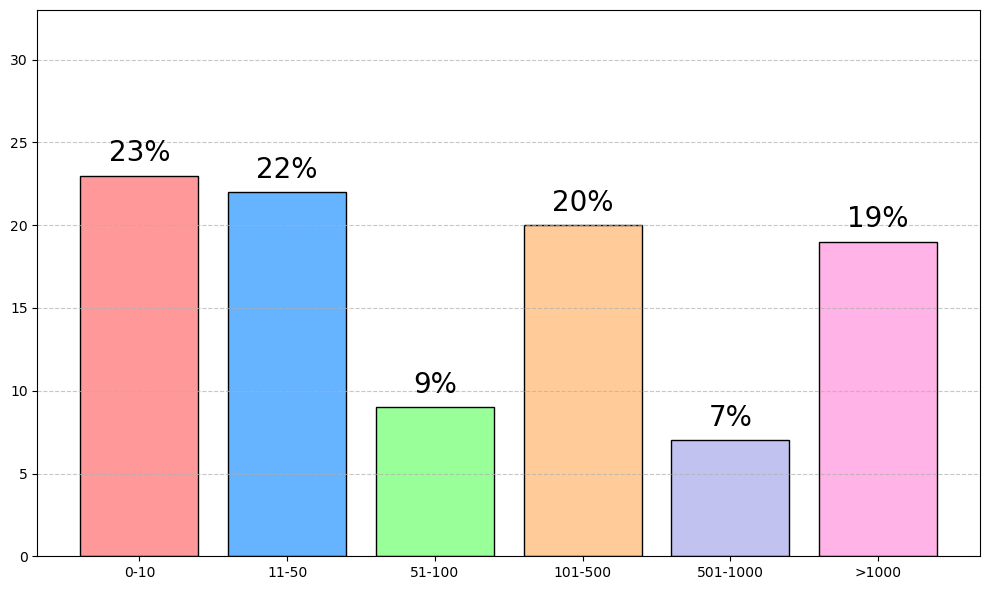

In [11]:
import matplotlib.pyplot as plt

# Data
categories = ['0-10', '11-50', '51-100', '101-500', '501-1000', '>1000']
percentages = [23, 22, 9, 20, 7, 19]

# Colors (optional, pleasant to look at)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors, edgecolor='black')

# Adding percentage labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha='center', va='bottom', fontsize=20)

# Chart labels and title
# plt.xlabel('Commit Categories', fontsize=12)
#plt.ylabel('Percentage (%)', fontsize=12)
#plt.title('Commits in All Categories', fontsize=14)

# Improved aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(percentages) + 10)

# Display chart
# plt.tight_layout()
# plt.show







plt.tight_layout()
# plt.savefig("Watcher1.png", dpi=300)  # Save as PNG with 300 DPI
plt.savefig("Commm1.pdf", dpi=300)  # Save as PDF with 300 DPI

plt.show()




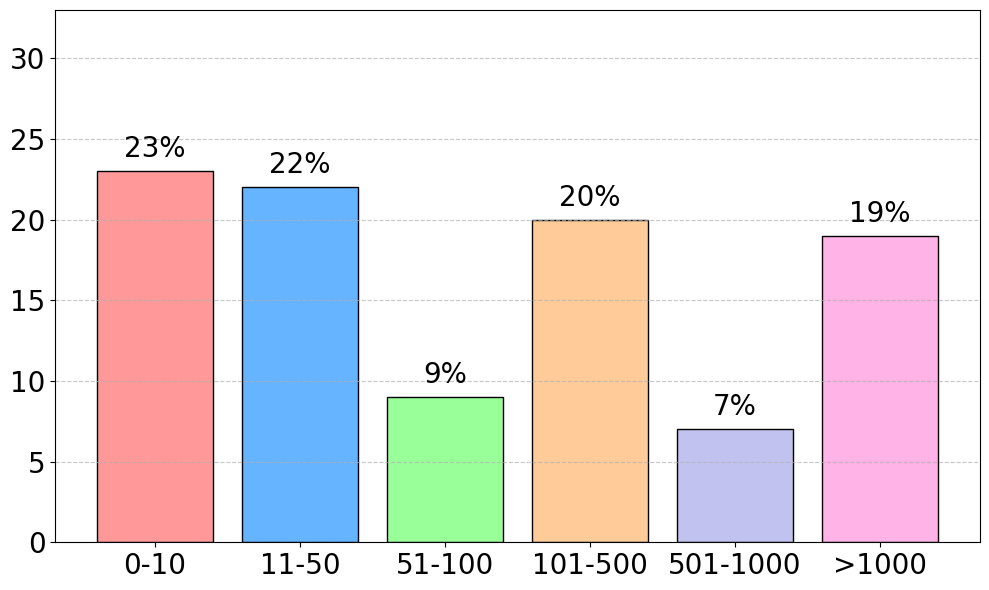

In [12]:
import matplotlib.pyplot as plt

# Data
categories = ['0-10', '11-50', '51-100', '101-500', '501-1000', '>1000']
percentages = [23, 22, 9, 20, 7, 19]

# Colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=colors, edgecolor='black')

# Adding percentage labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', 
             ha='center', va='bottom', fontsize=20)

# Set font size of axis tick labels
plt.xticks(fontsize=20)  # Increase x-axis tick labels
plt.yticks(fontsize=20)  # Increase y-axis tick labels

# Optional axis labels and title
# plt.xlabel('Commit Categories', fontsize=14)
# plt.ylabel('Percentage (%)', fontsize=14)
# plt.title('Commits in All Categories', fontsize=16)

# Aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(percentages) + 10)

plt.tight_layout()

# Save as PDF with 300 DPI
plt.savefig("Commm1.pdf", dpi=300)
plt.show()


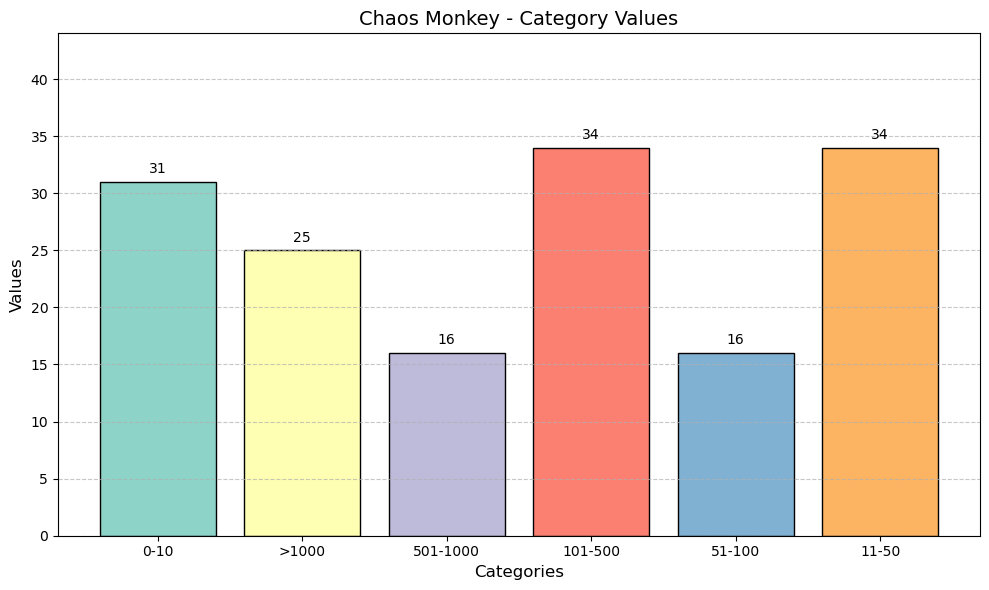

In [13]:
import matplotlib.pyplot as plt

# Data
categories = ['0-10', '>1000', '501-1000', '101-500', '51-100', '11-50']
values = [31, 25, 16, 34, 16, 34]

# Colors (optional for better visualization)
colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462']

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=colors, edgecolor='black')

# Adding value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}', ha='center', va='bottom', fontsize=10)

# Chart labels and title
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Chaos Monkey - Category Values', fontsize=14)

# Improved aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(values) + 10)

# Display chart
plt.tight_layout()
plt.show()


In [24]:
import re

# The given long text
text = """	Development
Industry	Development
Public	Development
Public	Development
Public	Development
Personal	Development
Personal	Teaching
Public	Teaching
Academia	Research
Industry	Development
Academia	Development
Public	Teaching
Industry	Development
Personal	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Industry	Development
Personal	Development




	
"""

# Using a regular expression to find all occurrences of "Pod Kill"
pod_kill_count = len(re.findall(r'\bdevelopment\b', text, re.IGNORECASE))

print(f"{pod_kill_count} times in the text.")

21 times in the text.


In [109]:
import re
from collections import Counter

# The given long text
text = """

No
Yes
Yes
No
No
No
No
No
No
No
Yes
No
No
No
No
Yes
No
Yes
Yes
Yes
No
No
Yes
Yes
No
Yes
No
No
No
Yes
No
Yes
No
No
Yes
Yes
No
No
No
Yes
No
No
No
No
No
Yes

No
No
Yes
No
No
No
No
No
No 
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
Yes
No
No
No
No
No
No
No
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
No
Yes
No
No
No
No
No
No
Yes
Yes
Yes
No
Yes
No
No
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No 
No
Yes
No
No
No
Yes
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
No
No
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
Yes
Yes
No
Yes
Yes
No
Yes
No
No
No 
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
No
No
No
Yes
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
No 
Yes
Yes
No 
Yes
No
No
Yes
Yes
Yes
Yes
Yes
No
Yes
No
No
No
Yes
No
No
No
Yes
No
Yes
No
Yes
No
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
No
Yes
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
Yes
Yes
No
No
No
No
No
No
Yes
No
No
Yes
No
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
No
No
No
No
Yes
No
No
No
Yes
No
Yes
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
No
No
No
No
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
No
Yes
Yes
No
No
No
No
No
Yes
No
Yes
No
Yes
No
No
Yes
Yes
Yes
No
Yes
No
Yes
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
Yes
Yes
No
No
No
Yes
No
Yes
Yes
No
No
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
Yes
Yes
No
No
Yes
Yes
No
Yes
No
No
No
No
No
No
Yes
No
No
No
Yes
No
Yes
No
No
No
No
No
Yes
No
Yes
Yes
No
No
No
Yes
No
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
yes
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
No
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
Yes
No
No
Yes
No
No
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
No
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
No
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
No
No
No
Yes
Yes
No
No
No
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
Yes
Yes
No
No
No
Yes
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
No
Yes
No
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
No
No
No
Yes
Yes
No
Yes
No
Yes
Yes
Yes
No
No
No
Yes
No
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
No
Yes
No
No
No
No
Yes
Yes
No
No
No
Yes
No
No
No
Yes
Yes
No
Yes
No
No
No
No
No
No
Yes
Yes
Yes
Yes
No
Yes
No
No
Yes
No
No
Yes
Yes
No
No
Yes
No
No
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
Yes
No
No
Yes
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
No
Yes
No
Yes
No
No
No
Yes
No
Yes
No
No
Yes
No
No
No
No
No
No
Yes
No
Yes
Yes
Yes
Yes
No
No
No
Yes
No
No
No
No
Yes
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
No
No
No
No
Yes
No
No
No
Yes
No
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
yes
Yes
Yes
No
No
No
No
No
No
No
No
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
No
No
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
No
No
No
No
No
Yes
No
Yes
Yes
Yes
No
Yes
No
No
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
No
No
No
Yes
No
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
No
Yes
No
No
Yes
No
Yes
No
Yes
No
No
Yes
No
Yes
Yes
No
Yes
No
No
No
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
Yes
No
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
No
No
No
No
Yes
No
No
No
No
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
No
No
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
No
No
No
No
Yes
Yes
No
No
Yes
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
Yes
Yes
No
No
No
No
No
Yes
Yes
No
Yes
No
No
No
No
No
Yes
Yes
No
No
No
No
No
No
Yes
No
No
No
No
Yes
No
Yes
No
Yes
No
No
Yes
No
Yes
No
No
Yes
No
No
No
No
Yes
No
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
No
No
No
No
No
No
Yes
Yes
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
Yes
No
No
No
Yes
Yes
No
No
Yes
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
Yes
No
Yes
No
Yes
Yes
No
Yes
No
No
No
No
No
Yes
Yes
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
No
No
No
Yes
No
Yes
No
Yes
No
No
Yes
No
No
No
Yes
No
Yes
Yes
No
Yes
No
No
No
Yes
No
No
Yes
No
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
No
No
Yes
Yes
No
Yes
No
No
No
Yes
No
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
No
No
Yes
No
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
No
Yes
Yes
No
No
Yes
No
Yes
Yes
No
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
YesNo
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
Yes
Yes
No
No
No
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
No
No
No
No
No
No
No
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
NoNo
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
Yes
Yes
Yes
Yes
No
No
No
No
Yes
Yes
No
No
Yes
No
Yes
No
Yes
No
Yes
Yes
No
No
Yes
No
No
Yes
Yes
No
No
No
Yes
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
No
No
No
No
Yes
No
No
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
NoYes
No
yes
Yes
Yes
No
No
No
Yes
No
No
No
YesNo
Yes
No
Yes
Yes
Yes
Yes
No
Yes
No
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
No
No
No
No
Yes
Yes
Yes
Yes
Yes
No
No
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
No
Yes
No
No
Yes
Yes
"""

# List of keywords to count
keywords = ["Yes", "No", "Academia", "Industry", "Personal", "Public", "Teaching", "Learning", "Research", "Development", "Unclassified"]

# Convert text into a list of words
words = re.findall(r'\b\w+\b', text, re.IGNORECASE)

# Count occurrences of each keyword
word_counts = Counter(word for word in words if word in keywords)

# Print the results
for word in keywords:
    print(f"{word}: {word_counts.get(word, 0)}")


Yes: 1081
No: 968
Academia: 0
Industry: 0
Personal: 0
Public: 0
Teaching: 0
Learning: 0
Research: 0
Development: 0
Unclassified: 0


In [111]:
import pandas as pd









# Convert data into a pandas DataFrame
data_lines = data.split("\n")
header = data_lines[0].split("\t")
rows = [line.split("\t") for line in data_lines[1:] if line]
df = pd.DataFrame(rows, columns=header)
df["numberOfCommits"] = df["numberOfCommits"].astype(int)

# Define categories and their ranges
categories = ["Learning", "Teaching", "Development", "Research", "Unclassified"]
ranges = {
    "0-50": (0, 50),
    "11-50": (11, 50),
    "51-100": (51, 100),
    "101-500": (101, 500),
    "501-1000": (501, 1000),
    ">1000": (1001, float("inf"))
}

# Function to categorize commit counts
def categorize_commit_counts(df, category):
    filtered_df = df[df["Purpose"] == category]
    count_ranges = {key: 0 for key in ranges.keys()}
    
    for count in filtered_df["numberOfCommits"]:
        for range_label, (low, high) in ranges.items():
            if low <= count <= high:
                count_ranges[range_label] += 1
                break
    return count_ranges

# Process each category
category_results = {}
for category in categories:
    category_results[category] = categorize_commit_counts(df, category)

# Print results
for category, counts in category_results.items():
    print(f"{category}:")
    for range_label, count in counts.items():
        print(f"  {range_label}: {count}")


Learning:
  0-50: 0
  11-50: 0
  51-100: 1
  101-500: 2
  501-1000: 1
  >1000: 2
Teaching:
  0-50: 7
  11-50: 0
  51-100: 1
  101-500: 1
  501-1000: 1
  >1000: 0
Development:
  0-50: 1
  11-50: 0
  51-100: 0
  101-500: 5
  501-1000: 0
  >1000: 2
Research:
  0-50: 1
  11-50: 0
  51-100: 0
  101-500: 0
  501-1000: 0
  >1000: 0
Unclassified:
  0-50: 3
  11-50: 0
  51-100: 0
  101-500: 1
  501-1000: 1
  >1000: 0


In [117]:
# import pandas as pd


# data = """numberOfCommits\tType\tPurpose
# 195\tIndustry\tTeaching
# 1428\tPersonal\tDevelopment
# 82\tPersonal\tLearning
# 109\tIndustry\tDevelopment
# 6\tIndustry\tTeaching
# 22\tPersonal\tTeaching
# 129\tPersonal\tLearning
# 346\tIndustry\tDevelopment
# 124\tPersonal\tDevelopment
# 602\tPersonal\tLearning
# 8957\tIndustry\tDevelopment
# 13\tIndustry\tTeaching
# 749\tPersonal\tTeaching
# 1\tPersonal\tUnclassified
# 1\tPersonal\tTeaching
# 374\tPersonal\tUnclassified
# 71\tIndustry\tTeaching
# 106\tIndustry\tLearning
# 14\tAcademia\tResearch
# 210\tPersonal\tDevelopment
# 294\tIndustry\tDevelopment
# 15\tAcademia\tTeaching
# 514\tPersonal\tUnclassified
# 18\tIndustry\tUnclassified
# 5\tPersonal\tDevelopment
# 1\tPersonal\tTeaching
# 35\tPersonal\tTeaching
# 2894\tPersonal\tLearning
# 3474\tPersonal\tLearning
# 41\tPersonal\tUnclassified"""














# # Convert to DataFrame
# data_lines = data.strip().split("\n")
# header = data_lines[0].split("\t")
# rows = [line.split("\t") for line in data_lines[1:]]
# df = pd.DataFrame(rows, columns=header)
# df["numberOfCommits"] = df["numberOfCommits"].astype(int)

# # Define all categories (including "Public", even if missing)
# categories = ["Public", "Personal", "Industry", "Academia"]

# # Define commit count ranges
# ranges = {
#     "0-10": (0, 10),
#     "11-50": (11, 50),
#     "51-100": (51, 100),
#     "101-500": (101, 500),
#     "501-1000": (501, 1000),
#     ">1000": (1001, float("inf"))
# }

# # Function to count numberOfCommits per range for each category
# def categorize_commit_counts(df, category):
#     filtered_df = df[df["Type"] == category]
#     count_ranges = {key: 0 for key in ranges.keys()}
    
#     for count in filtered_df["numberOfCommits"]:
#         for range_label, (low, high) in ranges.items():
#             if low <= count <= high:
#                 count_ranges[range_label] += 1
#                 break
#     return count_ranges

# # Calculate results
# category_results = {}
# for category in categories:
#     category_results[category] = categorize_commit_counts(df, category)

# # Output results
# for category, counts in category_results.items():
#     print(f"{category}:")
#     for range_label, count in counts.items():
#         print(f"  {range_label}: {count}")


In [123]:
import pandas as pd



data = """numberOfCommits\tType\tPurpose
64883\tPublic\tDevelopment
39\tPublic\tDevelopment
7\tPublic\tDevelopment
20\tPublic\tTeaching
21\tPersonal\tUnclassified
32\tPublic\tDevelopment
3\tPersonal\tTeaching
16\tPersonal\tDevelopment
174\tPublic\tDevelopment
13\tPersonal\tDevelopment
7\tPersonal\tTeaching
78\tPublic\tDevelopment
51\tIndustry\tTeaching
2\tIndustry\tTeaching
62\tPublic\tLearning
8\tPersonal\tTeaching
231\tPersonal\tUnclassified
11\tPublic\tUnclassified
90\tPublic\tLearning
445\tPublic\tDevelopment
13\tIndustry\tDevelopment
438\tIndustry\tTeaching
295\tPublic\tDevelopment
152\tPublic\tDevelopment
26\tPublic\tDevelopment
39\tPublic\tDevelopment
54\tPublic\tDevelopment
40\tPublic\tDevelopment
47\tPublic\tDevelopment
56\tPublic\tDevelopment
29\tPublic\tDevelopment
28\tPublic\tDevelopment
19\tPublic\tDevelopment
22\tPublic\tDevelopment
221\tPublic\tDevelopment
23\tIndustry\tDevelopment
61\tIndustry\tDevelopment
27\tIndustry\tDevelopment
244\tIndustry\tDevelopment
47\tPublic\tDevelopment
94\tPublic\tDevelopment
340\tPublic\tDevelopment
15\tPublic\tDevelopment
18\tPublic\tDevelopment
15\tPublic\tDevelopment
9\tPublic\tDevelopment
21\tPublic\tDevelopment
38\tPersonal\tDevelopment
12\tPersonal\tDevelopment
78\tIndustry\tDevelopment
1385\tIndustry\tDevelopment
622\tIndustry\tDevelopment
2437\tIndustry\tResearch
26\tIndustry\tDevelopment
17\tPersonal\tLearning
5\tIndustry\tResearch
110\tPersonal\tTeaching
2\tPersonal\tUnclassified
11\tPersonal\tLearning
98\tPersonal\tLearning
62\tPersonal\tLearning
15\tPersonal\tTeaching
11\tIndustry\tDevelopment
11\tIndustry\tDevelopment
23\tIndustry\tDevelopment
20\tIndustry\tDevelopment
46\tPersonal\tLearning
135\tPersonal\tDevelopment
70\tPersonal\tDevelopment
13\tPersonal\tUnclassified
11\tPersonal\tDevelopment
14\tPersonal\tTeaching
30\tPersonal\tTeaching
6\tPersonal\tUnclassified
18\tPersonal\tUnclassified
16\tPersonal\tUnclassified
3\tPersonal\tTeaching
4\tPersonal\tLearning
7\tPersonal\tLearning
175\tIndustry\tDevelopment
456\tIndustry\tDevelopment"""









# Convert data into a pandas DataFrame
data_lines = data.split("\n")
header = data_lines[0].split("\t")
rows = [line.split("\t") for line in data_lines[1:] if line]
df = pd.DataFrame(rows, columns=header)
df["numberOfCommits"] = df["numberOfCommits"].astype(int)

# Define categories and their ranges
categories = ["Learning", "Teaching", "Development", "Research", "Unclassified"]
ranges = {
    "0-50": (0, 50),
    "11-50": (11, 50),
    "51-100": (51, 100),
    "101-500": (101, 500),
    "501-1000": (501, 1000),
    ">1000": (1001, float("inf"))
}

# Function to categorize commit counts
def categorize_commit_counts(df, category):
    filtered_df = df[df["Purpose"] == category]
    count_ranges = {key: 0 for key in ranges.keys()}
    
    for count in filtered_df["numberOfCommits"]:
        for range_label, (low, high) in ranges.items():
            if low <= count <= high:
                count_ranges[range_label] += 1
                break
    return count_ranges

# Process each category
category_results = {}
for category in categories:
    category_results[category] = categorize_commit_counts(df, category)

# Print results
for category, counts in category_results.items():
    print(f"{category}:")
    for range_label, count in counts.items():
        print(f"  {range_label}: {count}")


Learning:
  0-50: 5
  11-50: 0
  51-100: 4
  101-500: 0
  501-1000: 0
  >1000: 0
Teaching:
  0-50: 9
  11-50: 0
  51-100: 1
  101-500: 2
  501-1000: 0
  >1000: 0
Development:
  0-50: 30
  11-50: 0
  51-100: 7
  101-500: 10
  501-1000: 1
  >1000: 2
Research:
  0-50: 1
  11-50: 0
  51-100: 0
  101-500: 0
  501-1000: 0
  >1000: 1
Unclassified:
  0-50: 7
  11-50: 0
  51-100: 0
  101-500: 1
  501-1000: 0
  >1000: 0


In [125]:
import pandas as pd

data = """numberOfCommits\tType\tPurpose
64883\tPublic\tDevelopment
39\tPublic\tDevelopment
7\tPublic\tDevelopment
20\tPublic\tTeaching
21\tPersonal\tUnclassified
32\tPublic\tDevelopment
3\tPersonal\tTeaching
16\tPersonal\tDevelopment
174\tPublic\tDevelopment
13\tPersonal\tDevelopment
7\tPersonal\tTeaching
78\tPublic\tDevelopment
51\tIndustry\tTeaching
2\tIndustry\tTeaching
62\tPublic\tLearning
8\tPersonal\tTeaching
231\tPersonal\tUnclassified
11\tPublic\tUnclassified
90\tPublic\tLearning
445\tPublic\tDevelopment
13\tIndustry\tDevelopment
438\tIndustry\tTeaching
295\tPublic\tDevelopment
152\tPublic\tDevelopment
26\tPublic\tDevelopment
39\tPublic\tDevelopment
54\tPublic\tDevelopment
40\tPublic\tDevelopment
47\tPublic\tDevelopment
56\tPublic\tDevelopment
29\tPublic\tDevelopment
28\tPublic\tDevelopment
19\tPublic\tDevelopment
22\tPublic\tDevelopment
221\tPublic\tDevelopment
23\tIndustry\tDevelopment
61\tIndustry\tDevelopment
27\tIndustry\tDevelopment
244\tIndustry\tDevelopment
47\tPublic\tDevelopment
94\tPublic\tDevelopment
340\tPublic\tDevelopment
15\tPublic\tDevelopment
18\tPublic\tDevelopment
15\tPublic\tDevelopment
9\tPublic\tDevelopment
21\tPublic\tDevelopment
38\tPersonal\tDevelopment
12\tPersonal\tDevelopment
78\tIndustry\tDevelopment
1385\tIndustry\tDevelopment
622\tIndustry\tDevelopment
2437\tIndustry\tResearch
26\tIndustry\tDevelopment
17\tPersonal\tLearning
5\tIndustry\tResearch
110\tPersonal\tTeaching
2\tPersonal\tUnclassified
11\tPersonal\tLearning
98\tPersonal\tLearning
62\tPersonal\tLearning
15\tPersonal\tTeaching
11\tIndustry\tDevelopment
11\tIndustry\tDevelopment
23\tIndustry\tDevelopment
20\tIndustry\tDevelopment
46\tPersonal\tLearning
135\tPersonal\tDevelopment
70\tPersonal\tDevelopment
13\tPersonal\tUnclassified
11\tPersonal\tDevelopment
14\tPersonal\tTeaching
30\tPersonal\tTeaching
6\tPersonal\tUnclassified
18\tPersonal\tUnclassified
16\tPersonal\tUnclassified
3\tPersonal\tTeaching
4\tPersonal\tLearning
7\tPersonal\tLearning
175\tIndustry\tDevelopment
456\tIndustry\tDevelopment"""

# Convert data into a pandas DataFrame
data_lines = data.split("\n")
header = data_lines[0].split("\t")
rows = [line.split("\t") for line in data_lines[1:] if line]
df = pd.DataFrame(rows, columns=header)
df["numberOfCommits"] = df["numberOfCommits"].astype(int)

# Define non-overlapping categories and their ranges
categories = ["Learning", "Teaching", "Development", "Research", "Unclassified"]
ranges = {
    "0-10": (0, 10),
    "11-50": (11, 50),
    "51-100": (51, 100),
    "101-500": (101, 500),
    "501-1000": (501, 1000),
    ">1000": (1001, float("inf"))
}

# Function to categorize commit counts
def categorize_commit_counts(df, category):
    filtered_df = df[df["Purpose"] == category]
    count_ranges = {key: 0 for key in ranges.keys()}
    
    for count in filtered_df["numberOfCommits"]:
        for range_label, (low, high) in ranges.items():
            if low <= count <= high:
                count_ranges[range_label] += 1
                break
    return count_ranges

# Process each category
category_results = {}
for category in categories:
    category_results[category] = categorize_commit_counts(df, category)

# Print results
for category, counts in category_results.items():
    print(f"{category}:")
    for range_label, count in counts.items():
        print(f"  {range_label}: {count}")


Learning:
  0-10: 2
  11-50: 3
  51-100: 4
  101-500: 0
  501-1000: 0
  >1000: 0
Teaching:
  0-10: 5
  11-50: 4
  51-100: 1
  101-500: 2
  501-1000: 0
  >1000: 0
Development:
  0-10: 2
  11-50: 28
  51-100: 7
  101-500: 10
  501-1000: 1
  >1000: 2
Research:
  0-10: 1
  11-50: 0
  51-100: 0
  101-500: 0
  501-1000: 0
  >1000: 1
Unclassified:
  0-10: 2
  11-50: 5
  51-100: 0
  101-500: 1
  501-1000: 0
  >1000: 0


In [153]:
import pandas as pd


data = """numberOfCommits\tType\tPurpose
532\tIndustry\tDevelopment
29\tIndustry\tDevelopment
8\tIndustry\tUnclassified
1385\tPublic\tDevelopment
11\tPublic\tDevelopment
2\tPublic\tDevelopment
16\tPersonal\tUnclassified
17\tPersonal\tLearning
137\tPersonal\tUnclassified
25\tPersonal\tTeaching
21\tPublic\tTeaching
203\tAcademia\tResearch
6\tIndustry\tDevelopment
11\tAcademia\tDevelopment
524\tPublic\tTeaching
407\tIndustry\tDevelopment
1623\tPublic\tDevelopment
157\tIndustry\tDevelopment
306\tIndustry\tDevelopment
63\tIndustry\tDevelopment
1060\tIndustry\tDevelopment
1516\tIndustry\tDevelopment
12\tIndustry\tDevelopment
23\tIndustry\tDevelopment
2363\tIndustry\tDevelopment
2189\tIndustry\tDevelopment
205\tIndustry\tDevelopment
1561\tPersonal\tUnclassified
134\tPersonal\tUnclassified
13\tPersonal\tLearning"""





# Convert data into a pandas DataFrame
data_lines = data.split("\n")
header = data_lines[0].split("\t")
rows = [line.split("\t") for line in data_lines[1:] if line]
df = pd.DataFrame(rows, columns=header)
df["numberOfCommits"] = df["numberOfCommits"].astype(int)

# Define non-overlapping ranges
ranges = {
    "0-10": (0, 10),
    "11-50": (11, 50),
    "51-100": (51, 100),
    "101-500": (101, 500),
    "501-1000": (501, 1000),
    ">1000": (1001, float("inf"))
}

# Define both Purpose and Type categories
purpose_categories = ["Learning", "Teaching", "Development", "Research", "Unclassified"]
type_categories = ["Academia", "Industry", "Personal", "Public"]

# Function to categorize by any field (Purpose or Type)
def categorize_commit_counts(df, category_col, category_val):
    filtered_df = df[df[category_col] == category_val]
    count_ranges = {key: 0 for key in ranges.keys()}
    
    for count in filtered_df["numberOfCommits"]:
        for range_label, (low, high) in ranges.items():
            if low <= count <= high:
                count_ranges[range_label] += 1
                break
    return count_ranges

# Analyze Purpose
print("=== Commit Counts by Purpose ===")
for category in purpose_categories:
    print(f"{category}:")
    counts = categorize_commit_counts(df, "Purpose", category)
    for range_label, count in counts.items():
        print(f"  {range_label}: {count}")
    print()

# Analyze Type
print("=== Commit Counts by Type ===")
for category in type_categories:
    print(f"{category}:")
    counts = categorize_commit_counts(df, "Type", category)
    for range_label, count in counts.items():
        print(f"  {range_label}: {count}")
    print()


=== Commit Counts by Purpose ===
Learning:
  0-10: 0
  11-50: 2
  51-100: 0
  101-500: 0
  501-1000: 0
  >1000: 0

Teaching:
  0-10: 0
  11-50: 2
  51-100: 0
  101-500: 0
  501-1000: 1
  >1000: 0

Development:
  0-10: 2
  11-50: 5
  51-100: 1
  101-500: 4
  501-1000: 1
  >1000: 6

Research:
  0-10: 0
  11-50: 0
  51-100: 0
  101-500: 1
  501-1000: 0
  >1000: 0

Unclassified:
  0-10: 1
  11-50: 1
  51-100: 0
  101-500: 2
  501-1000: 0
  >1000: 1

=== Commit Counts by Type ===
Academia:
  0-10: 0
  11-50: 1
  51-100: 0
  101-500: 1
  501-1000: 0
  >1000: 0

Industry:
  0-10: 2
  11-50: 3
  51-100: 1
  101-500: 4
  501-1000: 1
  >1000: 4

Personal:
  0-10: 0
  11-50: 4
  51-100: 0
  101-500: 2
  501-1000: 0
  >1000: 1

Public:
  0-10: 1
  11-50: 2
  51-100: 0
  101-500: 0
  501-1000: 1
  >1000: 2

